In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from My_functions import reverse_colourmap

In [2]:
# PARAMETERS
prefix = "_migration" #"_test_nano" #"_no_sinking" #
save_figs = 0
save_path = "/data/rd_exchange/mbelharet/nemo_4-0_fabm_pisces/figures/"


In [3]:
id = "_1ts" #"1d" #
sim_duration = 2

files_home = "/data/rd_exchange/mbelharet/px_outputs/Migration" #"/data/rd_exchange/mbelharet/nemo_4.2_fabm_pisces" 
  
filename_fabm = "C1D_PAPA_fabm" + prefix + id + "_20100615_201" + str(sim_duration) + "0614_ptrc_T.nc"
filename_W_fabm = "C1D_PAPA_fabm" + prefix +  id + "_20100615_201" + str(sim_duration) + "0614_grid_W.nc"

#filename = "C1D_PAPA" + prefix +   id + "_20100615_201" + str(sim_duration) + "0614_ptrc_T.nc"
#filename_W = "C1D_PAPA" + prefix +  id +"_20100615_201" + str(sim_duration) + "0614_grid_W.nc"

In [4]:
data_fabm = xr.open_dataset(files_home + "/" + filename_fabm).isel(x=1, y=1)  
#data_W_fabm = xr.open_dataset(files_home + "/" + filename_W_fabm).isel(x=1, y=1)

#data = xr.open_dataset(files_home + "/" + filename).isel(x=0, y=0)
#data_W = xr.open_dataset(files_home + "/" + filename_W).isel(x=0, y=0)

FileNotFoundError: [Errno 2] No such file or directory: '/data/rd_exchange/mbelharet/px_outputs/Migration/C1D_PAPA_fabm_migration_1ts_20100615_20120614_grid_W.nc'

In [5]:
##### depth of vertical levels ######
depth = data_fabm['deptht'].to_numpy()
##### time counter ##################
time_counter = data_fabm['time_counter'].to_numpy()

In [6]:
flags = ["_fabm"] #, ""]

conv = [1 , 1]

#print("nano" + flag + "= data" + flag +"[\"nano_phyto\"].to_numpy()")
ncVars = ["nano_phyto", "diatoms" , "microzoo" , "mesozoo", "NO3", "DOM",
          "NH4", "PO4", "Si", "Fer", "POC", "GOC",
          "DSi", "DFe", "phyFe", "GOMFe", "POMFe", "phyCh",
           "DCh", "GOMCal", "CarDic", "CarAlk", "GOMSi", "O2"]

#ncVars_W = ["avt"]

In [7]:
##### Pisces variables #############
id = -1
for flag in flags:
    id+=1
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy() ")
    #for ncVar in ncVars_W:
        #exec(ncVar + flag + "= data_W" + flag +"[\"" + ncVar + "\"].to_numpy()")

In [10]:
def plot_hovmoller(variables, depth_limits, time_limits):
    depth_min = depth_limits[0]
    depth_max = depth_limits[1]
    dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
    dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

    ndt_min = time_limits[0]
    ndt_max = time_limits[1]
    

    fig = plt.figure(figsize=(10,8))
    my_cmap = reverse_colourmap(plt.cm.Spectral)
    
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        ldict = {}
        exec("v_fabm =" +  var + "_fabm[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v_fabm = ldict['v_fabm']
        
        
        v = np.transpose(v_fabm)

        x = np.arange(0,v.shape[1])*t_step
        [X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])
        
        pc = ax.pcolormesh(X,-dep,v,cmap=my_cmap,shading="gouraud")
        clb=fig.colorbar(pc)
        #pc.set_clim(-10,100)
        plt.title(var , fontsize=12)
        plt.xlabel("Time steps")
        plt.ylabel("Depth (m)")

    # Space between subplots
    fig.tight_layout(pad=1.5)


In [8]:
def plot_hovmoller_anomaly(variables, depth_limits, time_limits):
    depth_min = depth_limits[0]
    depth_max = depth_limits[1]
    dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
    dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]

    ndt_min = time_limits[0]
    ndt_max = time_limits[1]
    

    fig = plt.figure(figsize=(10,8))
    my_cmap = reverse_colourmap(plt.cm.Spectral)
    
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        ldict = {}
        exec("v_fabm =" +  var + "_fabm[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v_fabm = ldict['v_fabm']
        exec("v =" +  var + "[" + str(ndt_min) + ":" + str(ndt_max) + "," + str(dep_min_id) + ":" + str(dep_max_id) + "]", globals(),ldict)
        v = ldict['v']

        v_anomaly_ = 100*(v_fabm - v) / v
        v_anomaly = np.transpose(v_anomaly_)

        x = np.arange(0,v_anomaly.shape[1])*t_step
        [X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])
        
        pc = ax.pcolormesh(X,-dep,v_anomaly,cmap=my_cmap,shading="gouraud")
        clb=fig.colorbar(pc)
        #pc.set_clim(-10,100)
        plt.title(var , fontsize=12)
        plt.xlabel("Time steps")
        plt.ylabel("Depth (m)")

    # Space between subplots
    fig.tight_layout(pad=1.5)


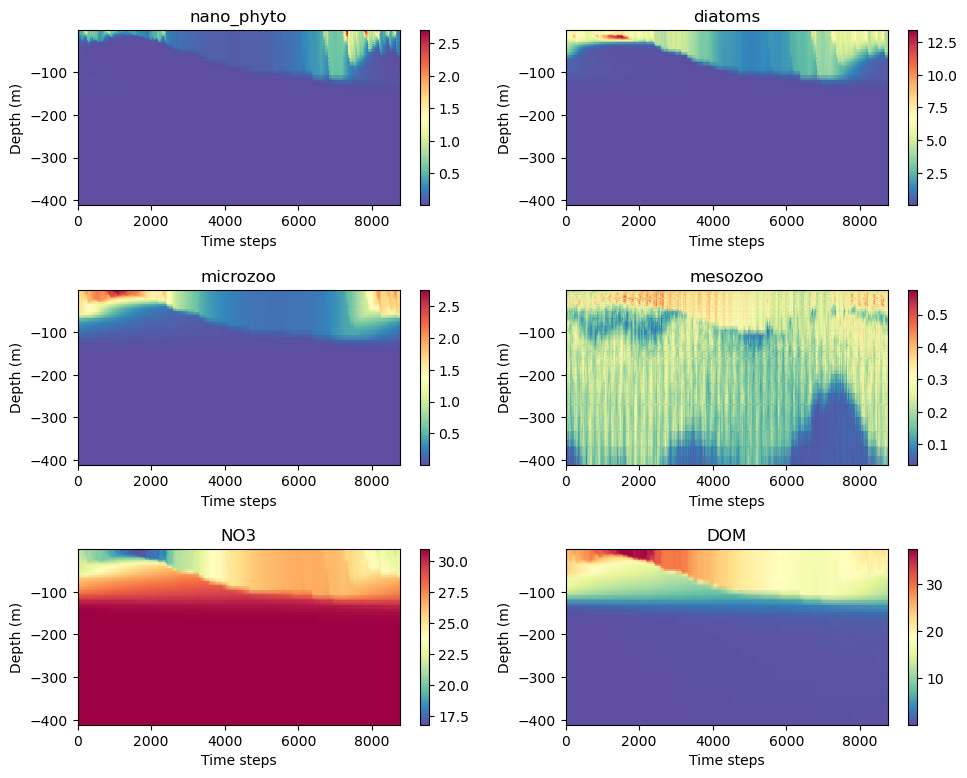

In [12]:
t_step = 1
variables1 = ncVars[0:6]
depth_limits = np.array([0, 500])
time_limits = np.array([24*365+1, 24*2*365])

#plot_hovmoller_anomaly(variables1, depth_limits, time_limits)
plot_hovmoller(variables1, depth_limits, time_limits)

In [ ]:

variables2 = ncVars[6:12]

plot_hovmoller_anomaly(variables2, depth_limits, time_limits)

In [ ]:

variables3 = ncVars[12:18]

plot_hovmoller_anomaly(variables3, depth_limits, time_limits)

In [ ]:

variables4 = ncVars[18:24]

plot_hovmoller_anomaly(variables4, depth_limits, time_limits)

In [ ]:
variables5 = ncVars_W[0:]

plot_hovmoller_anomaly(variables5, depth_limits, time_limits)